#### Zadanie 1

Dane są następujące obserwacje pochodzące z dwóch grup (klas) etykietowanych elementami ze zbioru $\mathcal{G} = \{0,1\}$:

|  A  |  B  |  C  || Y |
|-----|-----|-----||---|
| 1.0 | 1.3 | 2.6 || 0 |
| 2.2 | 1.1 | 1.2 || 1 |
| 2.0 | 2.4 | 3.8 || 1 |
| 1.5 | 3.2 | 2.1 || 0 |
| 3.2 | 1.2 | 4.2 || 1 |

A, B, C to zmienne (zwane także cechami lub atrybutami) a Y określa etykietę grupy, do której należy dana obserwacja. 

Rozważmy następujący model predykcyjny   

$$M_\mathbf{w}(x_0,x_1) = \frac{1}{1+e^{-(w_0x_0+w_1x_1)}},$$

gdzie $\mathbf{w} = (w_0, w_1)$ to odpowienio wagi wejść $x_0$ i $x_1$ w dwóch przypadkach:
* wejścia $x_0$ i $x_1$ to odpowiednio cechy A i B;
* wejścia $x_0$ i $x_1$ to odpowiednio cechy B i C.

Proszę napisać program w Pythonie, który oblicza błąd średniokwadratowy (ang. *Mean Squared Error*) powyższego modelu w obu przypadkach dla danych obserwacji. Program powininen wyliczać błędy dla wszystkich kombinacji wartości wag, gdzie $w_0 \in [0, 0.1, 0.2, ..., 1]$ oraz $w_1 \in [2, 2.1, 2.2, ..., 3]$. Dla każdego z dwóch przypadków wynikiem działania programu powinna być tablica 2D z wartościami błędu dla poszczególnych kombinacji wag oraz wykres błędu jako funkcji wag $w_0$, $w_1$. 

Błąd średniokwadratowy jest zadany ogólnym wzorem
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat y_i)^2,$$
gdzie $y_i$ to rzeczywiste wartości z danych a $\hat y_i$ to wartości przewidywane przez model.

Proszę przesłać plik .py lub .ipynb z kodem programu za pomocą platformy Moodle przed upływem wyznaczonego terminu.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Dane obserwacji
data = np.array([
    [1.0, 1.3, 2.6, 0],
    [2.2, 1.1, 1.2, 1],
    [2.0, 2.4, 3.8, 1],
    [1.5, 3.2, 2.1, 0],
    [3.2, 1.2, 4.2, 1]
])

# data

In [19]:
# Funkcja sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
# Oblicz MSE dla danego zestawu wag
def calculate_mse(data, w0, w1, feature1, feature2):
    predictions = sigmoid(w0 * data[:, feature1] + w1 * data[:, feature2])
    mse = np.mean((data[:, 3] - predictions) ** 2)
    return mse

In [29]:
# Zakres wartości wag
w0_values = np.arange(0, 1.1, 0.1)
w1_values = np.arange(2, 3.1, 0.1)

# w0_values, w1_values

In [41]:
# Inicjalizacja macierzy wynikowej
mse_values_1 = np.zeros((len(w0_values), len(w1_values)))
mse_values_2 = np.zeros((len(w0_values), len(w1_values)))

# Oblicz MSE dla wszystkich kombinacji wag w obu przypadkach
for i, w0 in enumerate(w0_values):
    for j, w1 in enumerate(w1_values):
        mse_values_1[i, j] = calculate_mse(data, w0, w1, 0, 1)
        mse_values_2[i, j] = calculate_mse(data, w0, w1, 1, 2)


# mse_values_1, mse_values_2

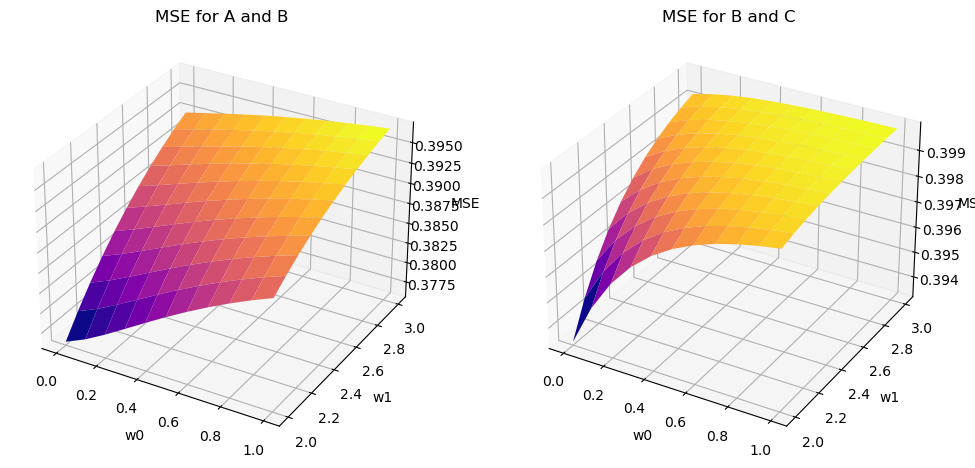

In [55]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

W0, W1 = np.meshgrid(w0_values, w1_values)

ax1.plot_surface(W0, W1, mse_values_1.T, cmap='plasma')
ax1.set(title='MSE for A and B',
       zlabel='MSE', xlabel='w0', ylabel='w1')

ax2.plot_surface(W0, W1, mse_values_2.T, cmap='plasma')
ax2.set(title='MSE for B and C',
       zlabel='MSE', xlabel='w0', ylabel='w1')

plt.show()


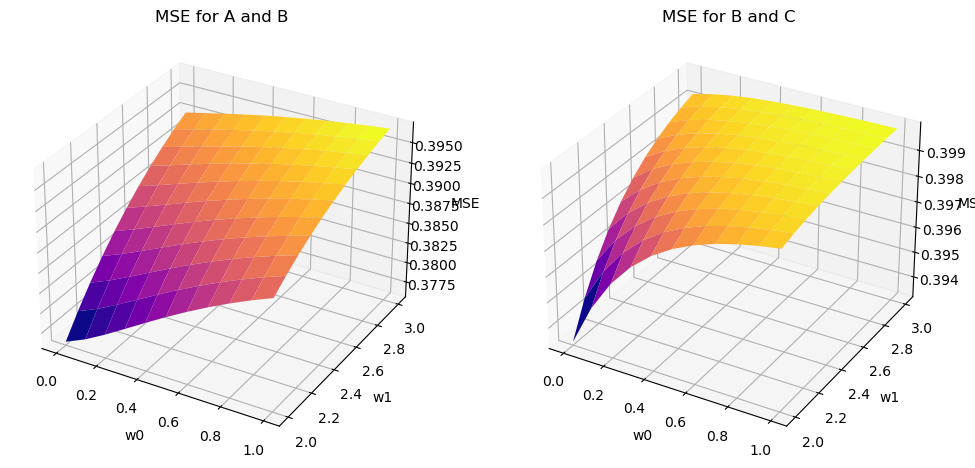